**Goal**: We aim to generate and visualize the PCA for auto-mpg dataset and extract insights.

**Dataset**:
- mpg: miles per gallon
- cyl: number of cylinders
- disp: engine displacement (cu. inches) or engine size
- hp: horsepower
- wt: vehicle weight (lbs.)
- acc: time taken to accelerate from 0 to 60 mph (sec.)
- yr: model year
- car name: car model name

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [25]:
data = pd.read_csv('./data/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [27]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [28]:
data['car name'].nunique()

305

In [29]:
data.drop(['car name'], axis=1, inplace=True)

### **Checking values in horsepower column**

In [30]:
data['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [31]:
# There are values that are not digit
hpIsDigit = pd.DataFrame(data['horsepower'].str.isdigit())

data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,?,2046,19.0,71
126,21.0,6,200.0,?,2875,17.0,74
330,40.9,4,85.0,?,1835,17.3,80
336,23.6,4,140.0,?,2905,14.3,80
354,34.5,4,100.0,?,2320,15.8,81
374,23.0,4,151.0,?,3035,20.5,82


In [32]:
# replacing the ? to nan values
data = data.replace('?', np.nan)
data[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
32,25.0,4,98.0,NaN,2046,19.0,71
126,21.0,6,200.0,NaN,2875,17.0,74
330,40.9,4,85.0,NaN,1835,17.3,80
336,23.6,4,140.0,NaN,2905,14.3,80
354,34.5,4,100.0,NaN,2320,15.8,81
374,23.0,4,151.0,NaN,3035,20.5,82


In [33]:
# Checking the distribution of horsepower. It does not follow a normal distribution, so we will replace it with the median
data['horsepower'].fillna(data['horsepower'].median(), inplace=True)
data['horsepower'] = data['horsepower'].astype('float64')  # converting the hp column from object data type to float

mpg
Skew 0.45706634399491913


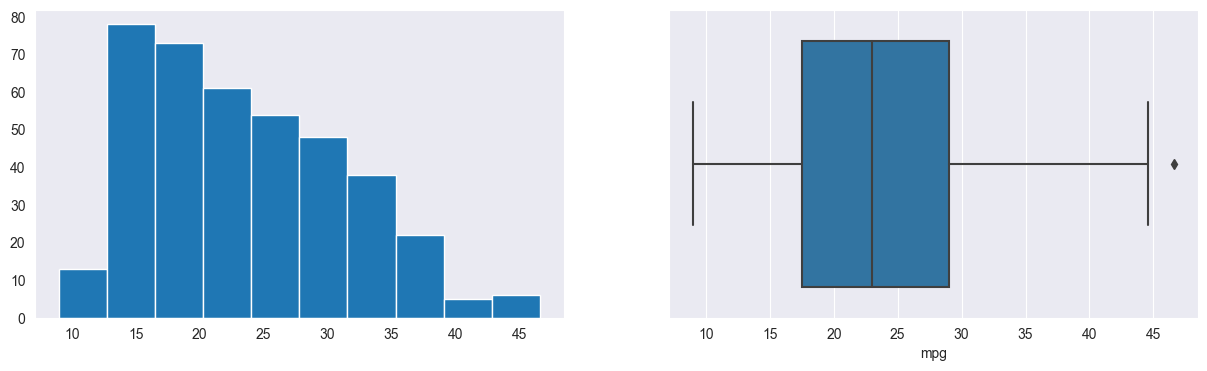

cylinders
Skew 0.5269215453528939


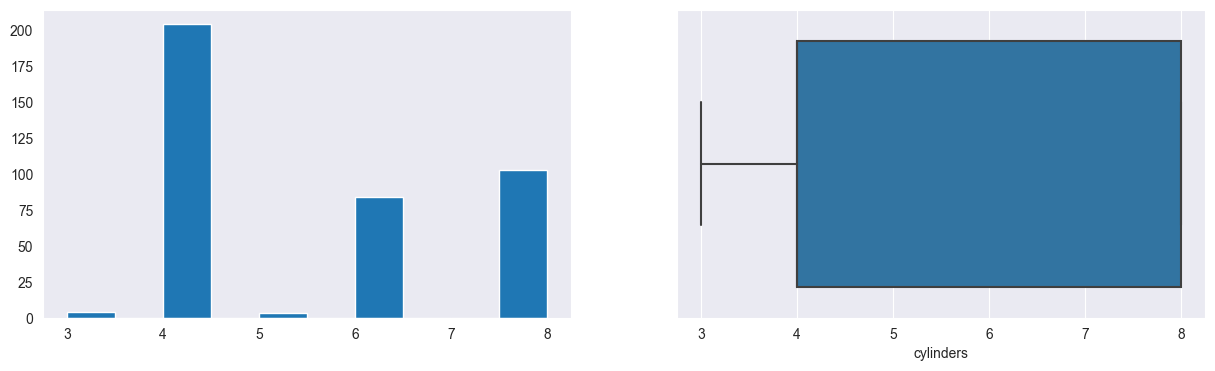

displacement
Skew 0.7196451643005952


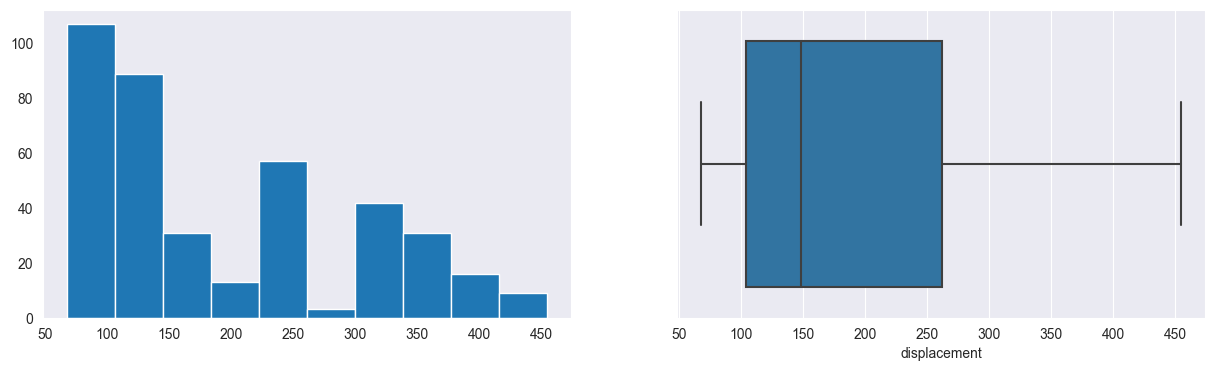

horsepower
Skew 1.1062242930872614


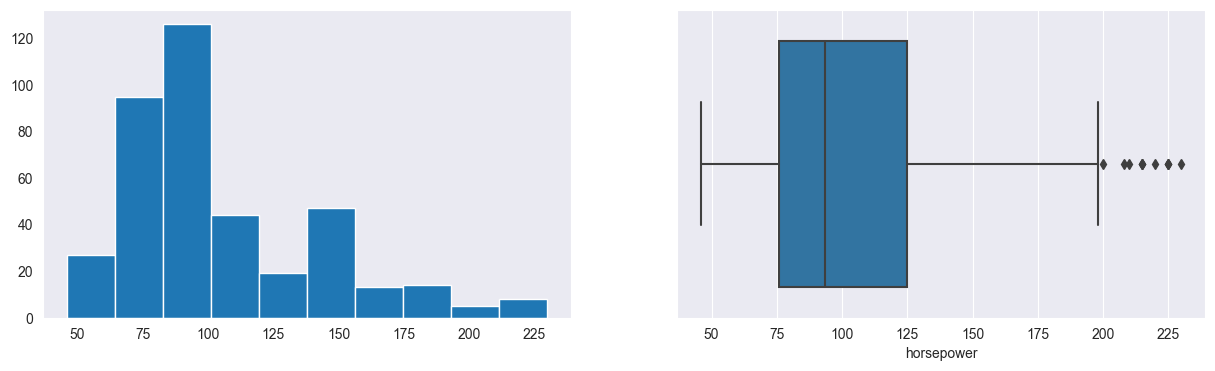

weight
Skew 0.5310625125994629


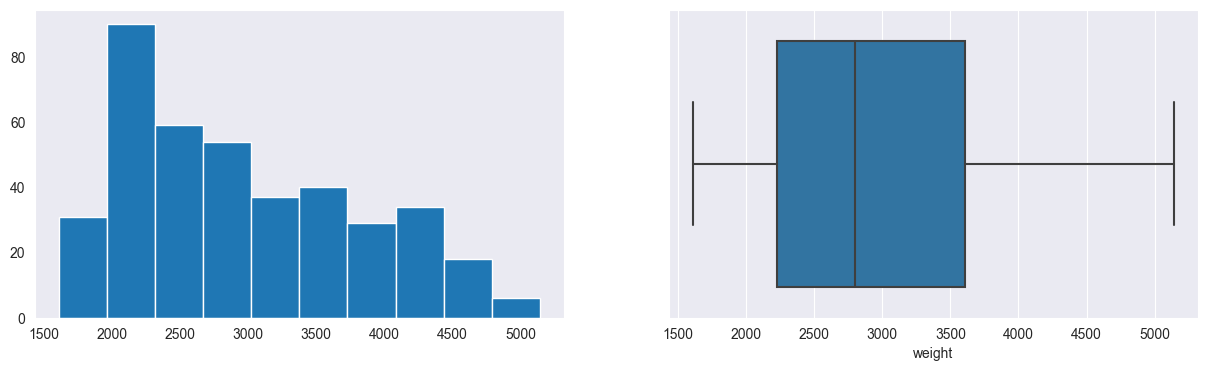

acceleration
Skew 0.27877684462588986


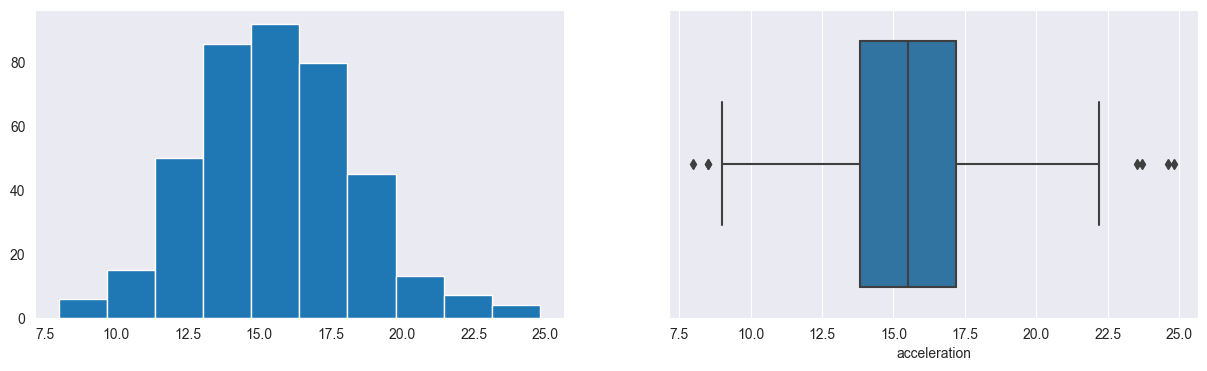

model year
Skew 0.01153459401509278


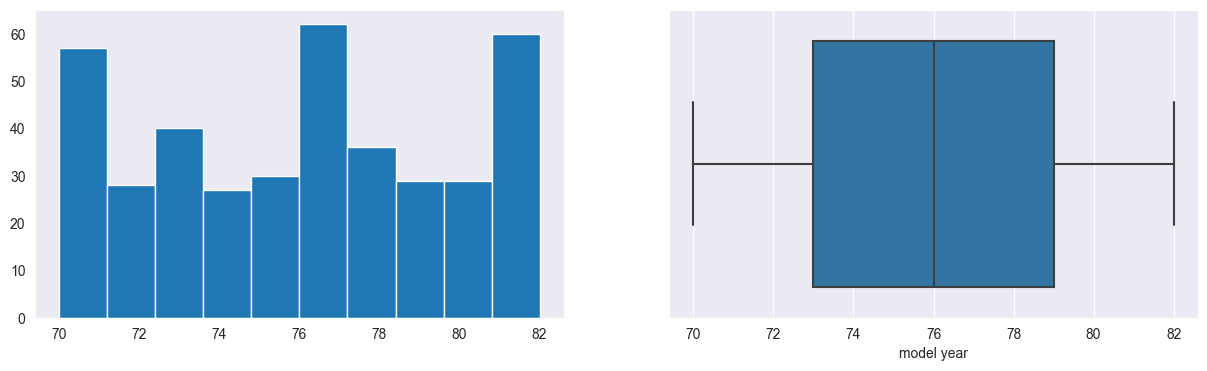

In [34]:
for col in data.columns:
    print(col)
    print('Skew', data[col].skew())
    plt.figure(figsize=(15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(bins=10, grid=False)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

Observations:
- The mpg, displacement, weight columns are right skewed.
- The most common number of cylinders is 4.
- The acceleration is normally distributed.
- Most # of cars are 76 or 77 years model.
- No variable has very extreme values in the data.

### **Checking Correlation**

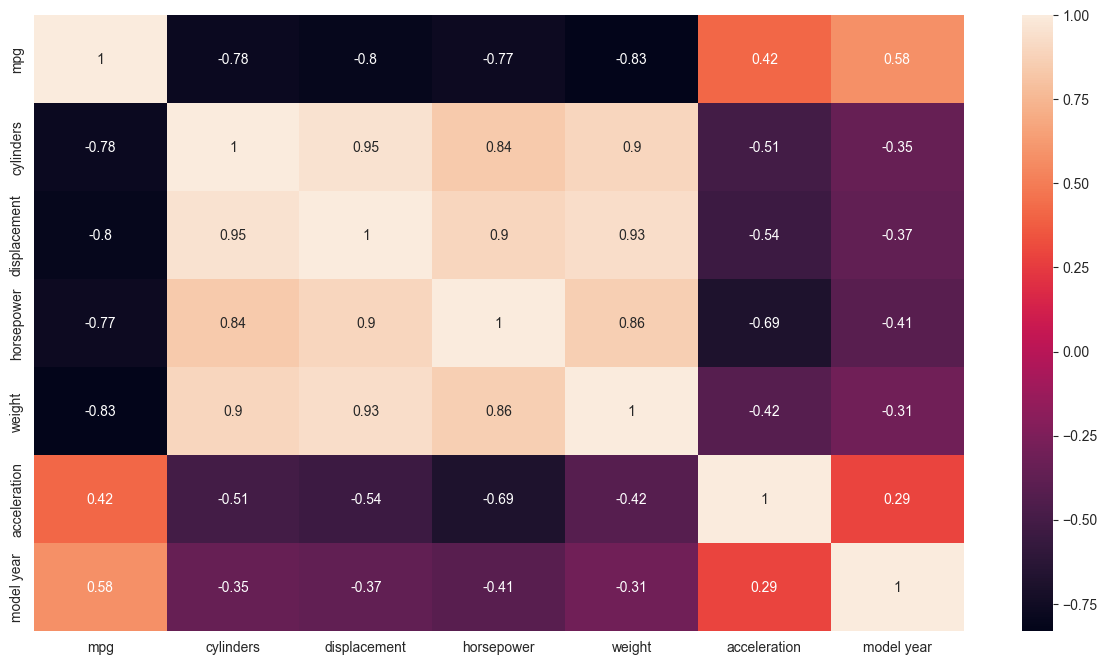

In [35]:
plt.figure(figsize=(15, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

**Observations:**
- the variable mpg has strong correlation with cylinders, displacement, horsepower and weight.
- horsepower and acceleration are negatively correlated.
- The variable weight has strong positively correlation with horsepower, displacement and cylinders.
- Model year is positively correlated with mpg.



### **Scaling the Data**

In [36]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


### **Principal Component Analysis**

In [37]:
# Defining the number of principal components to generate
n = data_scaled.shape[1]

# Finding the principal component of the data
pca = PCA(n_components=n, random_state=1)
data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))
exp_var = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

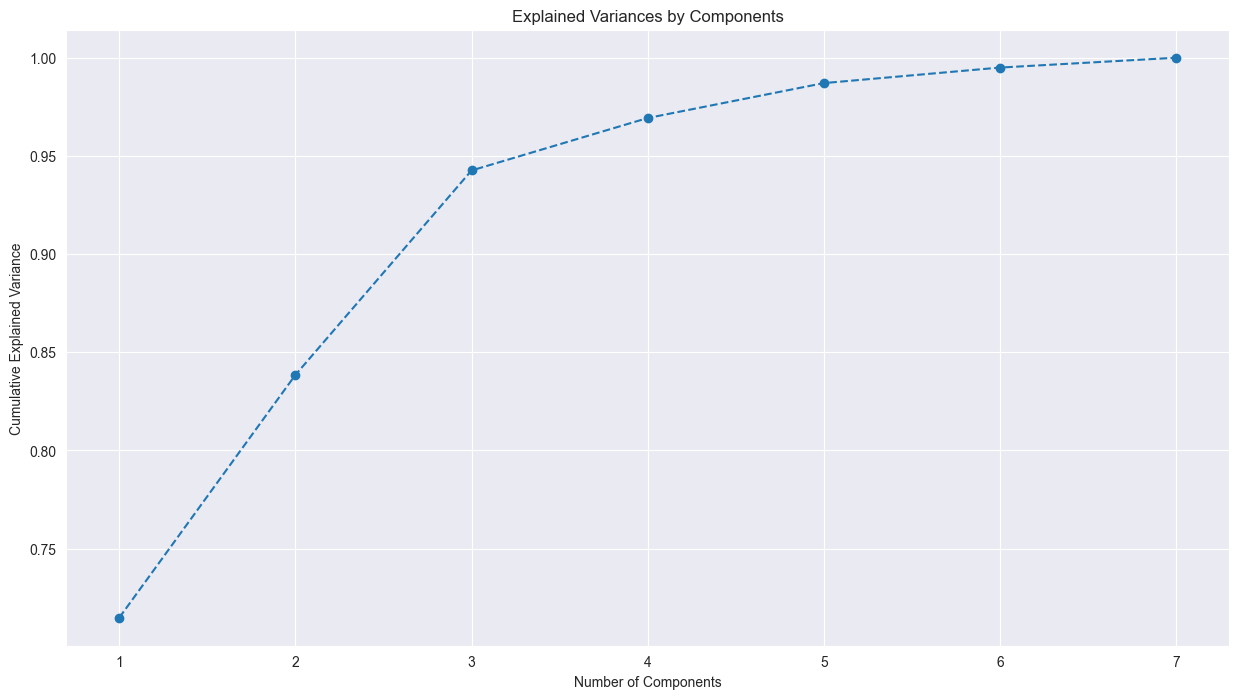

In [39]:
# Visualize the explained variance by individual components
plt.figure(figsize=(15, 8))
plt.plot(range(1, 8), exp_var.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variances by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [40]:
# find the least # of components that can explain more than 90% of variance
sum=0
for ix, i in enumerate(exp_var):
    sum+=i
    if(sum>0.90):
        print('Number of PCs that explain at least 90% variance:', ix+1)
        break

Number of PCs that explain at least 90% variance: 3


- We can see that out of the 7 original features, we reduced the # of features through principal components to 3, these components explain more than 90% of variance of the original variance.
- So that is about 57% reduction in the dimensionality with a loss of 10% in variance. Let us now look at these principal components as a linear combination of original features.

In [41]:
pc_comps = ['pc1', 'pc2', 'pc3']
data_pca = pd.DataFrame(pca.components_[:3, :], index=pc_comps, columns=data_scaled.columns)
data_pca.T

,pc1,pc2,pc3
mpg,-0.397737,-0.211430,-0.256579
cylinders,0.416485,-0.191612,0.140786
displacement,0.429713,-0.177428,0.103649
horsepower,0.422311,-0.090327,-0.168064
weight,0.414224,-0.221956,0.279668
acceleration,-0.284828,0.024110,0.892645
model year,-0.229428,-0.910548,-0.018109


Text(0, 0.5, 'PC2')

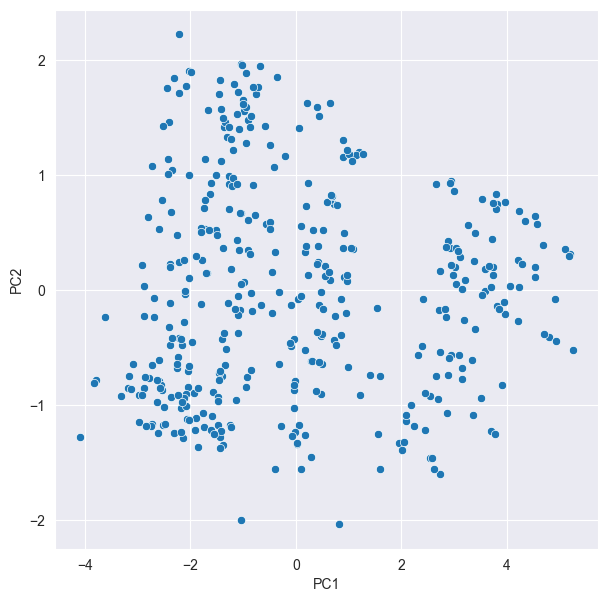

In [42]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=data_pca1[0], y=data_pca1[1])
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

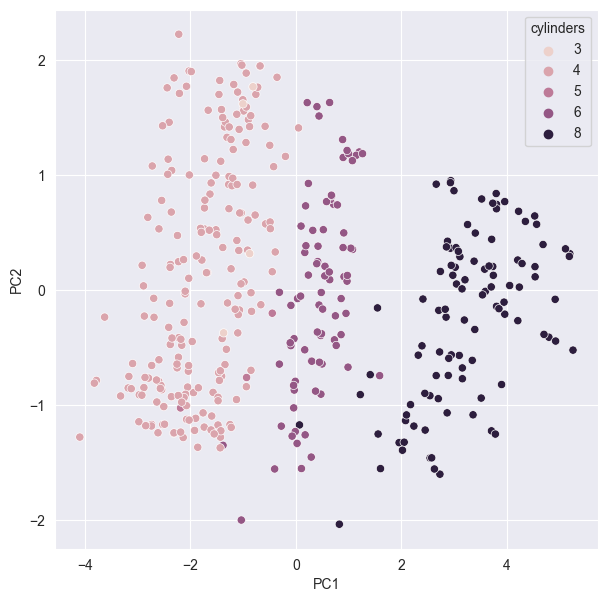

In [43]:
df_concat = pd.concat([data_pca1, data], axis=1)
plt.figure(figsize=(7, 7))
sns.scatterplot(x=-0, y=1, data=df_concat, hue='cylinders')
plt.xlabel('PC1')
plt.ylabel('PC2')